In [1]:
# Import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [2]:
# Reading the dataset with pandas

In [3]:
PATH = '../Data/Raw_Diamonds.csv'
diamonds = pd.read_csv(PATH)

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [5]:
# From this analysis we are able to see that cut, color and clarity are objects, which means that are 
# categorical values. The rest of the values are numerical, integers and floats. 
# Apparently there are no null values, therefore we might not need to clean up the dataset

In [6]:
# Another way of analyzing if there are any null or NaN values in the dataset

In [7]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [9]:
# From this analysis we are able to see a sample of 5 rows just to get a sense of the data

In [10]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [11]:
# From this table we can extract interesting insights: 

# There are 40.555 values in our diamonds dataset
# The maximum price someone paid for a diamond is $18.823, I'm assuming the currency is in dollars
# x, y and z seem to be values that express length, width and depth of the diamond
# We might calculate a volume to get a simplified calculation of those 3 numerical values
# If x, y and z expresses those numeric values, it's quite unlikely that a diamond has 0 in either one of those,
# therefore, we might need to inspect for missing values 

In [12]:
diamonds.loc[diamonds['x']==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
14815,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0


In [13]:
diamonds.loc[diamonds['y']==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
26192,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
28029,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
34423,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0


In [14]:
diamonds.loc[diamonds['z']==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
1606,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
3945,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
6465,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.0
13839,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,0.0
14815,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
14891,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
16425,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
19856,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
21602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24795,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0


In [15]:
len(diamonds.loc[diamonds['z']==0])

16

In [16]:
# From this analysis of finding missing values we can see that x and y share the same results, except 14815 index
# Whereas locating 0 values in z we find 16 values in comparison to 5 and 4, x and y, respectively. 
# Since there are missing values and we want a pristine dataset, we are going to get rid of those 5 x values

In [17]:
diamonds_filtered = diamonds[diamonds.x !=0]

In [18]:
print(diamonds.shape)
print(diamonds_filtered.shape)

(40455, 10)
(40450, 10)


In [36]:
# Just to confirm that those 5 missing values were removed from the dataset. Now we have a cleaner dataset to begin
# exploring our data in a more visual way

In [ ]:
plt.figure

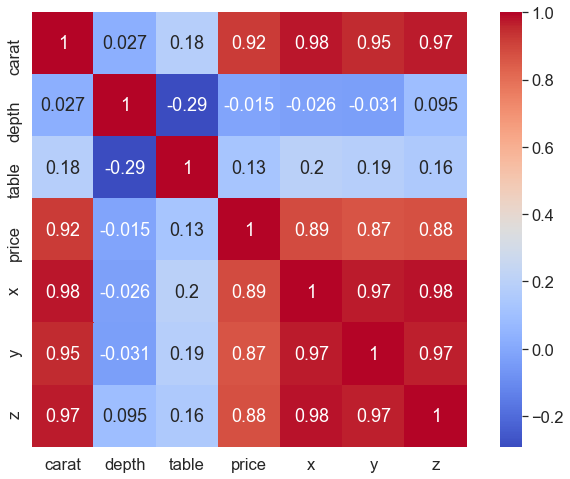

In [25]:
plt.figure(figsize=(12,8))  
p1 = sns.heatmap(diamonds_filtered.corr(), annot=True,cmap='coolwarm',square=True)

In [ ]:
# From this correlation matrix we can extract the following conclusions: 

# Carat has a strong correlation with price
# x,y,z has a strong correlation with carat, which makes sense, the bigger the x,y,z values the more surface the 
# diamond will have, thus, more carats. 
# And since x,y,z and carat are directly related, the relationship between price is also strong

In [26]:
# Now let's take a look at the carat and price relationship through a scatter plot visualization

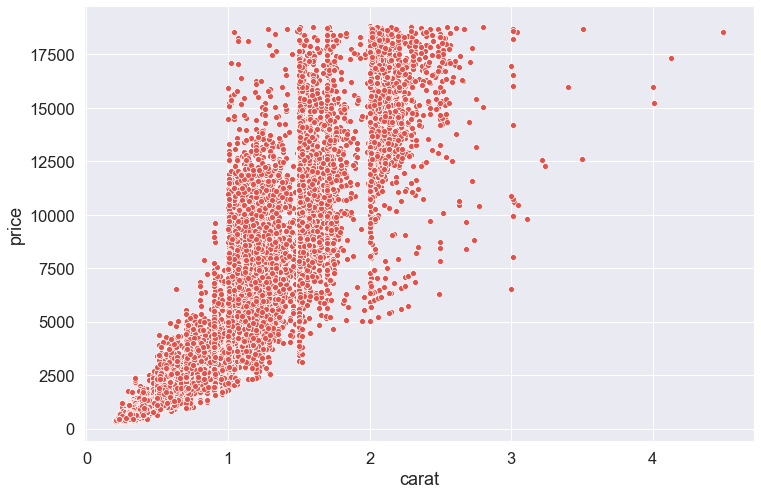

In [33]:
plt.figure(figsize=(12,8))
p2 = sns.scatterplot(data=diamonds_filtered, x="carat", y="price")

In [34]:
# Here we can see the distribution of all values from our diamond filtered dataset, clearly the bigger the carat
# size, the higher price will have. Interesting enough the dispersion or variability of price in diamonds 
# with 3 carats. There lowest value is located around the 6.000 mark and the highest over 17.500

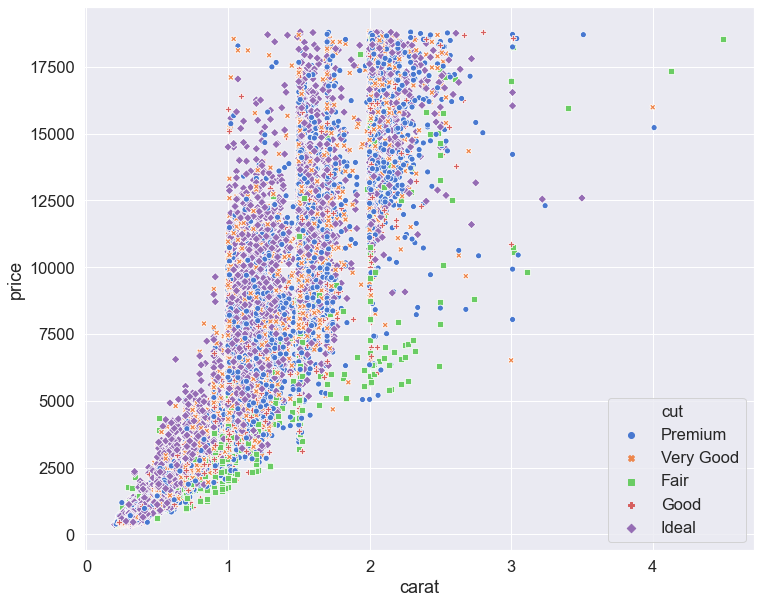

In [41]:
plt.figure(figsize=(12,10))
p3 = sns.scatterplot(data=diamonds_filtered, x="carat", y="price", hue="cut", palette="muted", style="cut")

In [39]:
# Getting deeper into our analysis, we broke down this visualization by a categorical variable called "Cut"
# which represents the type of cut that the diamond has, ranging from fair (lowest value) to ideal (highest).
# As we can see, the lowest price for a diamond in the 3 carat mark has ranked a "very good" category.
# This could be the threshold that separates the very good category from the premium and the ideal one, since
# only 2 more values are above this type, suggesting that are overpriced.

In [40]:
# Also from the previous analysis we can spot a few outliers that are quite unlikely to happen. Two diamonds 
# located at the right top quadrant, around 4 carats, they have a really high price. One overpassing the 17.500
# mark and the other one almost reaching it. Our hypothesis is that those diamonds with such a big carat are very
# rare to find and despite their "fair" rank, the pricing point was probably due to a big carat size.
# Let's continue exploring breaking down more dimensions.

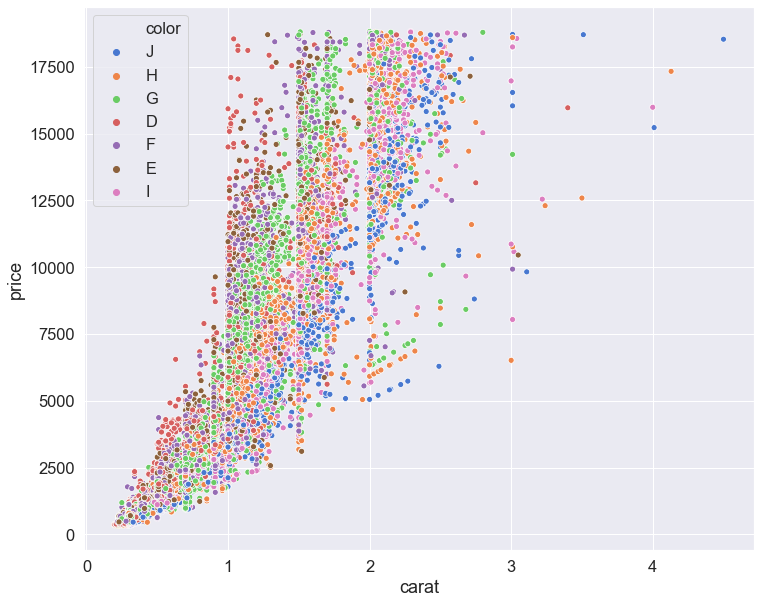

In [42]:
plt.figure(figsize=(12,10))
p4 = sns.scatterplot(data=diamonds_filtered, x="carat", y="price", hue="color", palette="muted")

In [43]:
# Now taking a look at the same visualization but broken down by color, we can see that our outlier with
# the biggest carat size scores the lowest type of visualization J.

In [46]:
diamonds_filtered.loc[diamonds_filtered['carat'].idxmax()]

carat        4.5
cut         Fair
color          J
clarity       I1
depth       65.8
table         58
price      18531
x          10.23
y          10.16
z           6.72
Name: 31083, dtype: object

In [ ]:
# Taking a deeper look at this outlier

In [49]:
diamonds_filtered.loc[diamonds_filtered['price'].idxmax()]

carat         2.29
cut        Premium
color            I
clarity        VS2
depth         60.8
table           60
price        18823
x              8.5
y             8.47
z             5.16
Name: 7034, dtype: object

In [50]:
# Now comparing its attributes with the highest price diamond, we can see that the carat size is lower, but 
# it scores higher in color and clarity. X and Y values are a bit lower than the rare diamond from above.

In [51]:
# Let's take a look at the distribution of the different values in our dataset

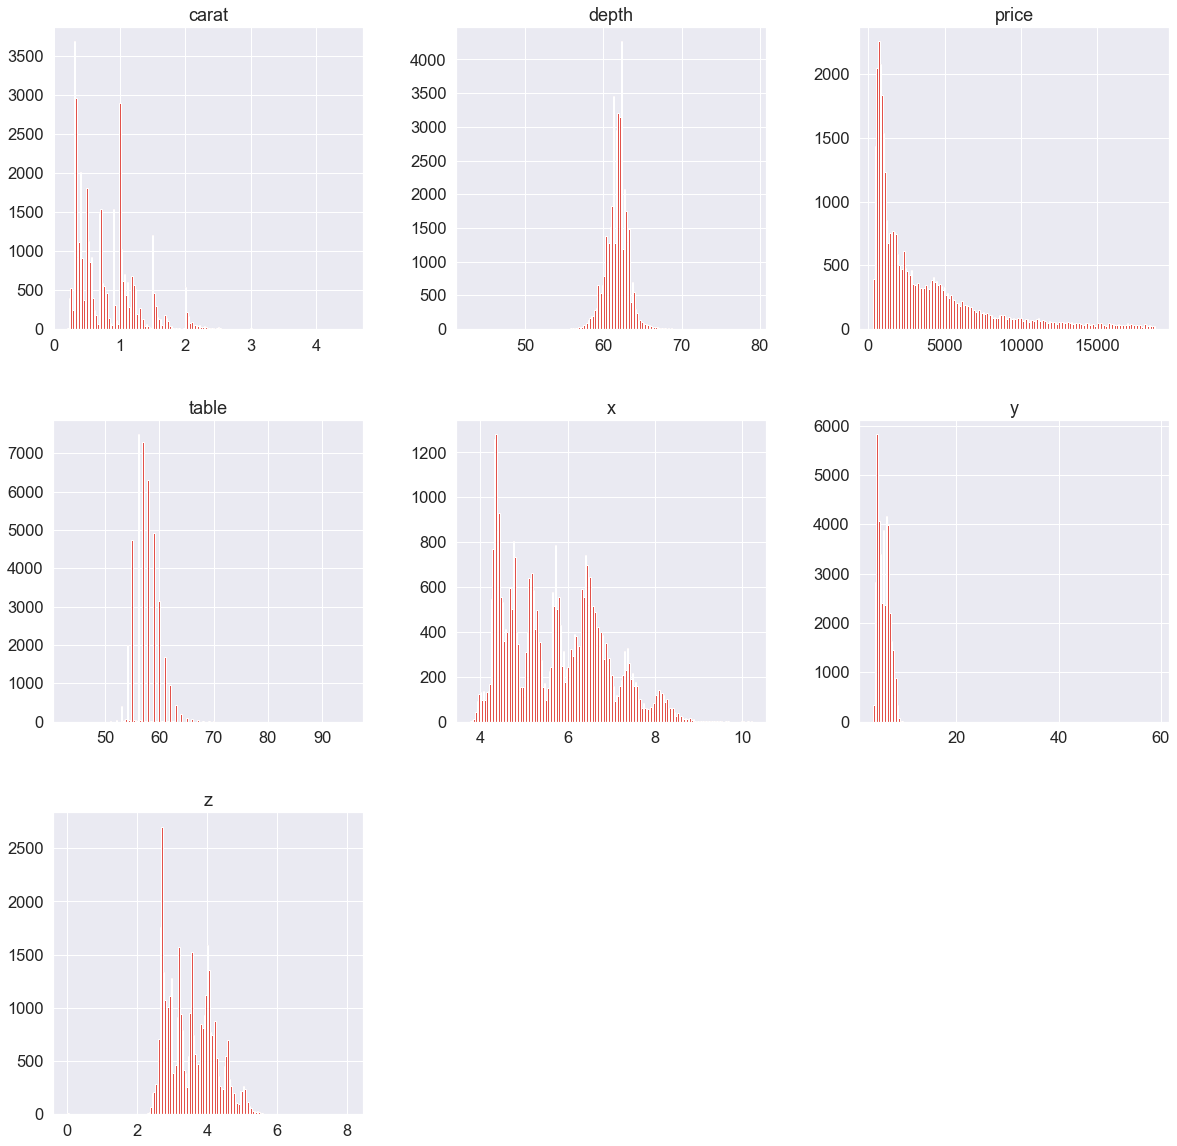

In [59]:
p5 = diamonds_filtered.hist(figsize = (20,20),bins=180)

In [ ]:
# From the charts above, we can see that the majority of values of our dataset for carat are located between 0.2 and 1
# Depth has a behavior of a normal distribution, the mean is located around 61.  
# Price distribution is skewed to the right, which means that some diamonds prices are spread out to the right side
# of the tail. This indicates a high variability and dispersion.

In [54]:
# Now let's take a deeper look at price distribution because this is the variable that interest us the most

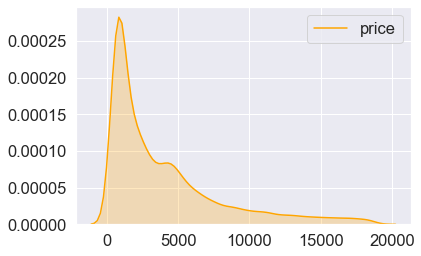

In [112]:
sns.kdeplot(diamonds_filtered['price'], shade=True, color='orange')

In [60]:
# Now let's explore our categorical variables: cut, color and clarity

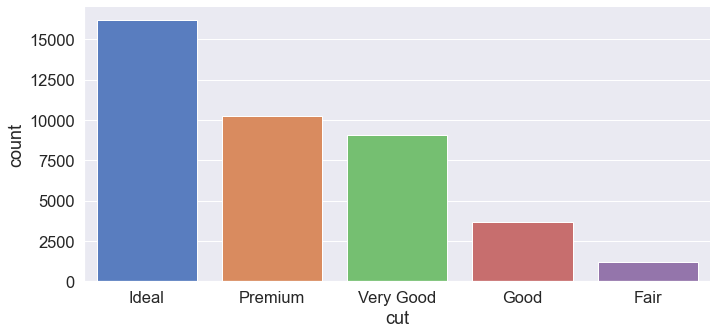

In [71]:
p6 = sns.catplot(data=diamonds_filtered, 
                 x='cut', 
                 kind='count', 
                 aspect=2.0, 
                 palette='muted', 
                 order=['Ideal','Premium','Very Good','Good','Fair'])

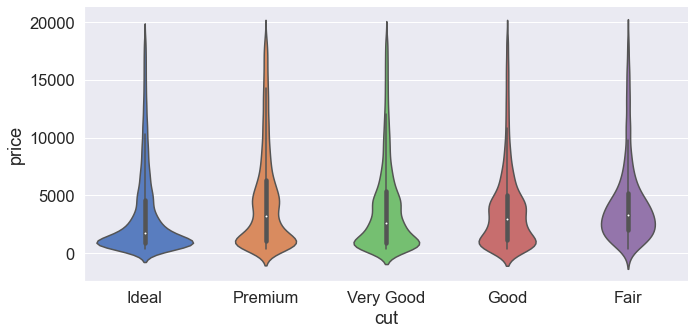

In [109]:
p6 = sns.catplot(data=diamonds_filtered, 
                 x='cut',  
                 y='price', 
                 kind='violin', 
                 aspect=2.0, 
                 palette='muted', 
                 order=['Ideal','Premium','Very Good','Good','Fair'])

In [73]:
# Comments here

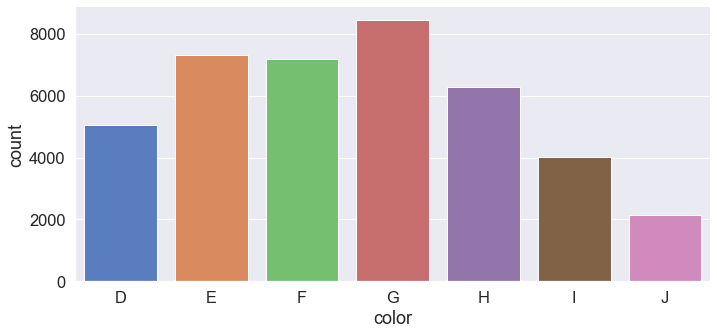

In [75]:
p7 = sns.catplot(data=diamonds_filtered, 
                 x='color', 
                 kind='count', 
                 aspect=2.0, 
                 palette='muted',
                 order=['D','E','F','G','H','I','J'])

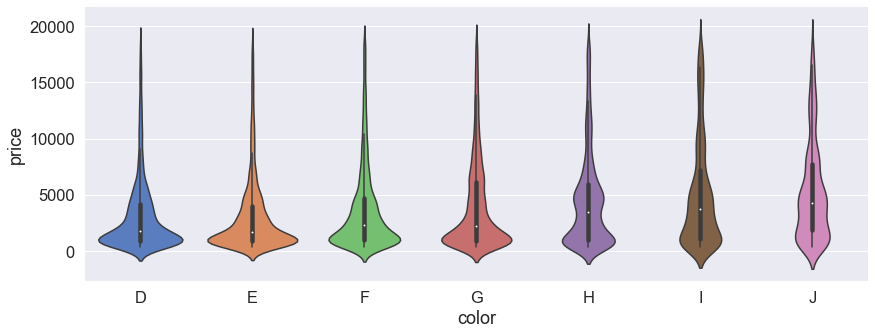

In [110]:
p7 = sns.catplot(data=diamonds_filtered, 
                 x='color',
                 y='price',
                 kind='violin', 
                 aspect=2.5, 
                 palette='muted',
                 order=['D','E','F','G','H','I','J'])

In [ ]:
# Comments here

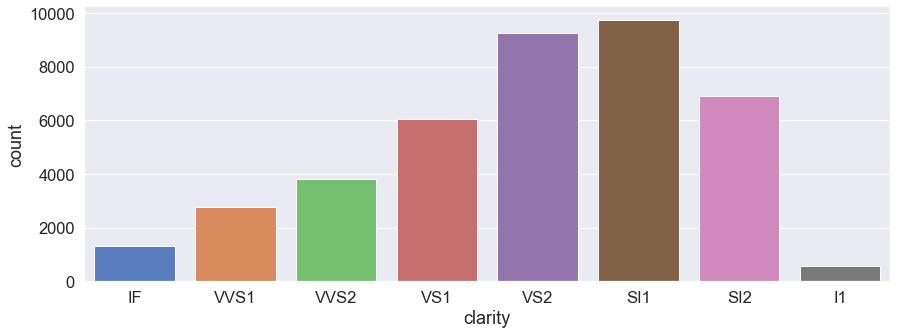

In [108]:
p8 = sns.catplot(data=diamonds_filtered, 
                 x='clarity', 
                 kind='count', 
                 aspect=2.5, 
                 palette='muted',
                 order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

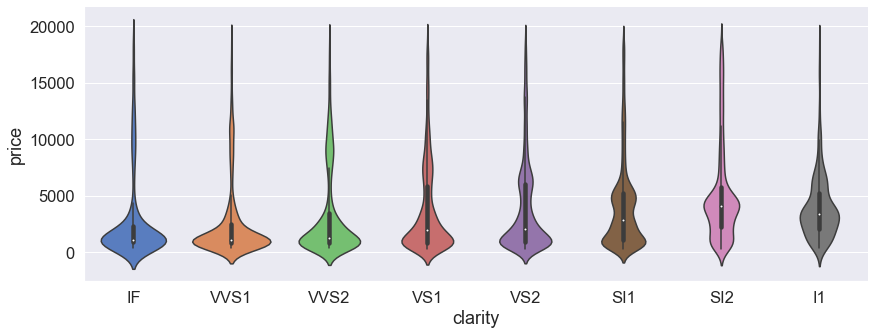

In [111]:
p8 = sns.catplot(data=diamonds_filtered, 
                 x='clarity',
                 y='price',
                 kind='violin', 
                 aspect=2.5, 
                 palette='muted',
                 order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

In [102]:
# Comments here